# CalphaTracer v0
Last modified: 6/08/23, DL

Plots Calpha positions of selected chains of a list of .pdb or .cif files with choice of colors. Saves output as svg files with a circular mask for easy rotation.

In [1]:
# Import relevant packages
import os
from Bio.PDB import PDBParser, MMCIFParser
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Helper functions
def list_structure_files(directory):
    files = []
    for filename in os.listdir(directory):
        if (".pdb" in filename) or (".cif" in filename):
            file_path = os.path.join(directory, filename)
            if os.path.isfile(file_path):
                files.append(file_path)
    return files

def generate_calpha_images(files: list, chains: list, colors: list, output_path: str , box_radius: float = 100.0):
    '''
    files = list of file names e.g. ['file1.pdb', 'file2.cif']
    chains = list of lists containing desired chains per file e.g. [['A', 'C'], ['B']]
    colors = list of lists containing desired colors for selected chains e.g. [['green', 'blue'],['#2ca022']]
    output_path = string containing output path
    box_radius = float of radius of bounding box and white circular patch, in cartesian coords
    '''
    for i, file in enumerate(files):
        # Read in file
        _, file_extension = os.path.splitext(file)
        if file_extension == ".pdb":
            parser = PDBParser()
            structure = parser.get_structure(os.path.basename(file), file)
        elif file_extension == ".cif":
            parser = MMCIFParser()
            structure = parser.get_structure(os.path.basename(file), file)
        else:
            raiseValueError(f"Unsupported file format: {file_extension} for {file}")

        # Set up variables and plot, check conditions
        fig, ax = plt.subplots()
        ax.set_aspect("equal")
        x_s = []
        y_s = []
        if len(colors[i]) != len(chains[i]):
            raiseValueError(f"Not enough colors for {file} provided")
        
        # Iterate through chains and plot Calphas
        for j, chain_id in enumerate(chains[i]):
            chain_id = chain_id.upper()
            if chain_id not in structure[0]:
                print(f"Chain {chain_id} not found in {file}")
                continue
            chain = structure[0][chain_id]
            residues = list(chain.get_residues())
            x_coords = [residue["CA"].get_coord()[0] for residue in residues]
            y_coords = [residue["CA"].get_coord()[1] for residue in residues]
            x_s += x_coords
            y_s += y_coords
            ax.plot(x_coords, y_coords, '-', color=colors[i][j])

        # Recenter plot and use proper box size
        xmean = np.mean(x_s)
        ymean = np.mean(y_s)
        ax.set_xlim(xmean - box_radius, xmean + box_radius)
        ax.set_ylim(ymean - box_radius, ymean + box_radius)
        ax.set_clip_path(plt.Circle((xmean, ymean), box_radius, color='white'))
        ax.axis('off')
        
        # Save and output figure
        output_filename = output_path + f"_chains_{'_'.join(chains[i])}_calphaplot.svg"
        print(f"File saved as {output_filename}")
        plt.savefig(output_filename, format='svg', bbox_inches='tight', transparent=True)
        plt.show()

In [ ]:

def generate_calpha_images(files: list, chains: list, colors: list, output_path: str , box_radius: float = 100.0):
    '''
    files = list of file names e.g. ['file1.pdb', 'file2.cif']
    chains = list of lists containing desired chains per file e.g. [['A', 'C'], ['B']]
    colors = list of lists containing desired colors for selected chains e.g. [['green', 'blue'],['#2ca022']]
    output_path = string containing output path
    box_radius = float of radius of bounding box and white circular patch, in cartesian coords
    '''
    for i, file in enumerate(files):
        # Read in file
        _, file_extension = os.path.splitext(file)
        if file_extension == ".pdb":
            parser = PDBParser()
            structure = parser.get_structure(os.path.basename(file), file)
        elif file_extension == ".cif":
            parser = MMCIFParser()
            structure = parser.get_structure(os.path.basename(file), file)
        else:
            raiseValueError(f"Unsupported file format: {file_extension} for {file}")

        # Set up variables and plot, check conditions
        fig, ax = plt.subplots()
        ax.set_aspect("equal")
        x_s = []
        y_s = []
        if len(colors[i]) != len(chains[i]):
            raiseValueError(f"Not enough colors for {file} provided")
        
        # Iterate through chains and plot Calphas
        for j, chain_id in enumerate(chains[i]):
            chain_id = chain_id.upper()
            if chain_id not in structure[0]:
                print(f"Chain {chain_id} not found in {file}")
                continue
            chain = structure[0][chain_id]
            residues = list(chain.get_residues())
            x_coords = [residue["CA"].get_coord()[0] for residue in residues]
            y_coords = [residue["CA"].get_coord()[1] for residue in residues]
            x_s += x_coords
            y_s += y_coords
            ax.plot(x_coords, y_coords, '-', color=colors[i][j])

        # Recenter plot and use proper box size
        xmean = np.mean(x_s)
        ymean = np.mean(y_s)
        ax.set_xlim(xmean - box_radius, xmean + box_radius)
        ax.set_ylim(ymean - box_radius, ymean + box_radius)
        ax.set_clip_path(plt.Circle((xmean, ymean), box_radius, color='white'))
        ax.axis('off')
        
        # Save and output figure
        output_filename = output_path + f"_chains_{'_'.join(chains[i])}_calphaplot.svg"
        print(f"File saved as {output_filename}")
        plt.savefig(output_filename, format='svg', bbox_inches='tight', transparent=True)
        plt.show()

In [ ]:
def plot_xy_crosssections(postprocess_mrc_files: list = None, postprocess_star_files: list = None, filepath: str = None, savefig: bool = True,
                          color_palette_list: list = None, type_names: list = None,  boxsize = 250, fontsize = 20, figsize_x = 30, images_per_row: int = 5,
                          panel_label: bool = False, panel_label_letter: str = "d",  panel_label_fontsize: int = 25,
                          panel_x = 0.01, panel_y = 0.99, color_lw = 8):
    n = len(postprocess_mrc_files)
    if panel_label:
        fig, axes = plt.subplots(int(np.ceil(n/images_per_row)), images_per_row, figsize = (figsize_x, int(np.ceil(n/images_per_row)+0.1)*figsize_x/images_per_row))
    else:
        fig, axes = plt.subplots(int(np.ceil(n/images_per_row)), images_per_row, figsize = (figsize_x, int(np.ceil(n/images_per_row))*figsize_x/images_per_row))
    
    axes = axes.flatten()
    for pp_job, ax in enumerate(axes):
        if pp_job < n:
            # Read in postprocessed map
            current_map_path = postprocess_mrc_files[pp_job]
            mrcdata, voxelsize = read_mrc_file(current_map_path)
        
            # Pull out central slice with either correct boxsize or as big as possible
            num_slices = int(np.round(4.75/voxelsize['x'])) # number of slices to combine for approx one rung
            if mrcdata.shape[0]*voxelsize['x']>= boxsize:
                edge = int(round(boxsize/voxelsize['x']/2))
                middle = int(np.ceil(mrcdata.shape[0]/2))
                sliced_mrcdata = mrcdata[middle-int(np.ceil(num_slices/2)):middle+int(np.floor(num_slices/2)), middle-edge:middle+edge, middle-edge:middle+edge]
            else:
                sliced_mrcdata = mrcdata[int(np.ceil(mrcdata.shape[0]/2)-np.ceil(num_slices/2)):int(np.ceil(mrcdata.shape[0]/2)+np.floor(num_slices/2)), :, :]
            central_slice = np.sum(sliced_mrcdata, axis = 0)

            # Plot central slice with a circular mask
            im = ax.imshow(central_slice, cmap = 'gray')
            mask = np.zeros_like(central_slice)
            mask_size = mask.shape[0]//2
            patch = patches.Circle((mask_size, mask_size), radius = mask_size, transform = ax.transData)
            im.set_clip_path(patch)
            if color_palette_list != None:
                patch2 = patches.Circle((mask_size, mask_size), radius = mask_size, fill = False, lw = color_lw, ec = color_palette_list[pp_job], transform = ax.transData)
                ax.add_patch(patch2)

            # Add text for the name of the filament and the resolution if relevant
            if type_names != None and color_palette_list != None:
                ax.text(-5, 15, type_names[pp_job], fontfamily = 'sans-serif', fontsize = fontsize, backgroundcolor = color_palette_list[pp_job], transform = ax.transData)# , fontweight = 'bold'
            elif type_names !=None:
                ax.text(-5, 15, type_names[pp_job], fontfamily = 'sans-serif', fontsize = fontsize, transform = ax.transData)    
            if postprocess_star_files != None:
                postprocess_star = starfile.read(postprocess_star_files[pp_job])
                mapresolution = np.round(postprocess_star['general']['rlnFinalResolution'][0], 2)
                ax.text(-5, 40, str(mapresolution)+' Å', fontfamily = 'sans-serif', fontsize = fontsize, transform = ax.transData)
            ax.axis('off')
        else:
            ax.axis('off')
            
    if panel_label:
        font = {'fontname': 'Arial', 'fontsize': panel_label_fontsize, 'fontweight': 'bold'}
        fig.suptitle(panel_label_letter, x = panel_x, y = panel_y, fontname = 'Arial', fontsize = panel_label_fontsize, fontweight = 'bold')
    
    # Show and save figures
    plt.tight_layout()
    plt.show()
    if savefig:
        if filepath != None:
            fig.savefig(f"{filepath}_map_xys.svg")
            print("Figure saved as "+f"{filepath}_map_xys.svg")
        else:
            fig.savefig("map_xys.svg")
            print("Figure saved as map_xys.svg")

In [ ]:
            # Plot central slice with a circular mask
            im = ax.imshow(central_slice, cmap = 'gray')
            mask = np.zeros_like(central_slice)
            mask_size = mask.shape[0]//2
            patch = patches.Circle((mask_size, mask_size), radius = mask_size, transform = ax.transData)
            im.set_clip_path(patch)
            if color_palette_list != None:
                patch2 = patches.Circle((mask_size, mask_size), radius = mask_size, fill = False, lw = color_lw, ec = color_palette_list[pp_job], transform = ax.transData)
                ax.add_patch(patch2)

# Main

In [3]:
list_structure_files("../ExampleData")

['../ExampleData/PHF.cif', '../ExampleData/Intermediate1_refined.pdb']

File saved as /Users/dli/Documents/FIA_paper_figures/test.svg_chains_C_D_calphaplot.svg


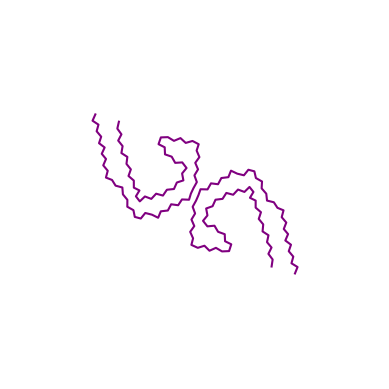

File saved as /Users/dli/Documents/FIA_paper_figures/test.svg_chains_E_L_calphaplot.svg


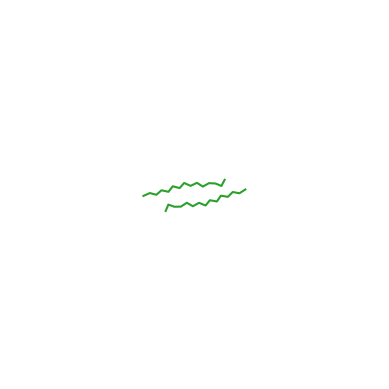

In [8]:
Files = list_structure_files("../ExampleData")
Chains = [["C", "D"], ["E", "L"]]
Colors = [['purple','purple'],["#2ca02c" , "#2ca02c"]]
Output_path = "/Users/dli/Documents/FIA_paper_figures/test.svg"
generate_calpha_images(Files, Chains, Colors, Output_path)